In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Context

In [51]:
# Контекст
# The actual Titanic data
df = pd.read_csv('train.csv');
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [10]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
df['Survived'].unique().tolist()

[1, 0]

In [5]:
df['Pclass'].unique().tolist()

[1, 3, 2]

In [6]:
df['Sex'].unique().tolist()

['male', 'female']

In [13]:
df['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [8]:
'''
The dataset contains Titanic's passengers infoormation:

PassengerId: Passenger Id
Survived: Survival (0 = No, 1 = Yes)
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: Passenger name
Sex: Sex (male, female)
Age: Age in years
SibSp: of siblings / spouses aboard the Titanic
Parch: of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
'''

'\nPassengerId: Passenger Id\nSurvived: Survival (0 = No, 1 = Yes)\nPclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)\nName: Passenger name\nSex: Sex (male, female)\nAge: Age in years\nSibSp: of siblings / spouses aboard the Titanic\nParch: of parents / children aboard the Titanic\nTicket: Ticket number\nFare: Passenger fare\nCabin: Cabin number\nEmbarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)\n'

# Data quality assessment

In [ ]:
# Оценка качества данных

In [21]:
print(f"Number of passengers is {len(df)}");

Number of passengers is 100000


In [22]:
print(f"Cabin nan-values is {df['Cabin'].isna().sum() / len(df['Cabin']) * 100} %");

Cabin nan-values is 67.866 %


In [26]:
print(f"Age nan-values is {df['Age'].isna().sum() / len(df['Age']) * 100} %");

Age nan-values is 3.292 %


In [27]:
print(f"Ticket nan-values is {df['Ticket'].isna().sum() / len(df['Ticket']) * 100} %");

Ticket nan-values is 4.623 %


In [28]:
print(f"Fare nan-values is {df['Fare'].isna().sum() / len(df['Fare']) * 100} %");

Fare nan-values is 0.134 %


In [29]:
print(f"Embarked nan-values is {df['Embarked'].isna().sum() / len(df['Embarked']) * 100} %");

Embarked nan-values is 0.25 %


In [20]:
#несколько колонок содержат NaN 
#There are a few columns with NaN values

In [52]:
df['Sex'].replace({'male': 0, 'female': 1},inplace=True)
df['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2},inplace=True)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",0,NaN,2,0,209245,27.14,C12239,2.0
1,1,0,3,"Bryan, Drew",0,NaN,0,0,27323,13.35,NaN,2.0
2,2,0,3,"Owens, Kenneth",0,0.33,1,2,CA 457703,71.29,NaN,2.0
3,3,0,3,"Kramer, James",0,19.00,0,0,A. 10866,13.04,NaN,2.0
4,4,1,3,"Bond, Michael",0,25.00,0,0,427635,7.76,NaN,2.0


# Data exploration

In [ ]:
# Исследование данных

In [57]:
df_ticket = df['Ticket'];
df_ticket = df_ticket.dropna();
dublicated_ticket = len(df_ticket[df_ticket.duplicated() == True]);
print(f'Number of dublicated tickets is {dublicated_ticket}');

Number of dublicated tickets is 20046


<AxesSubplot:>

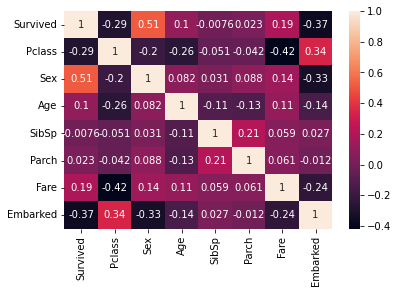

In [60]:
pass_data = df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin']);
pass_data.dropna()
pass_corr = pass_data.corr();
sns.heatmap(data=pass_corr, annot=True)

In [13]:
pass_data['Survived'].replace({0:'No',1:'Yes'},inplace=True)
pass_data['Pclass'].replace({1:'1st',2:'2nd', 3:'3rd'},inplace=True)
pass_data['Embarked'].replace({0:'C', 1:'Q', 2:'S'},inplace=True)
pass_data['Sex'].replace({0:'male', 1: 'female'},inplace=True)

<AxesSubplot:>

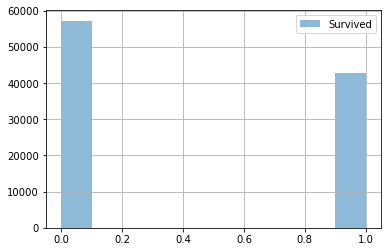

In [10]:
pass_data.Survived.hist(legend=True, alpha=0.5)

In [11]:
men = len(df[df['Sex'] == 0]);
women = len(df[df['Sex'] == 1]);
men_s = len(df[(df['Sex'] == 0) & (df['Survived'] == 1)]);
women_s = len(df[(df['Sex'] == 1) & (df['Survived'] == 1)]);
all_pass = men + women;
print(f'Number of men on the titanic = {men} ({men / all_pass} %), number of survived = {men_s} ({men_s / men}) %');
print(f'Number of women on the titanic = {women} ({women / all_pass} %), number of survived = {women_s} ({women_s / women}) %');

Number of men on the titanic = 56114 (0.56114 %), number of survived = 11548 (0.20579534519014864) %
Number of women on the titanic = 43886 (0.43886 %), number of survived = 31226 (0.7115253155903933) %


Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

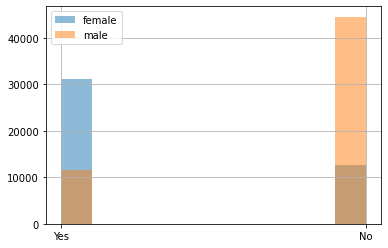

In [14]:
pass_data.groupby('Sex').Survived.hist(legend=True, alpha=0.5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

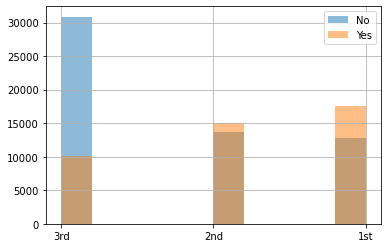

In [16]:
pass_data.groupby('Survived').Pclass.hist(legend=True, alpha=0.5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

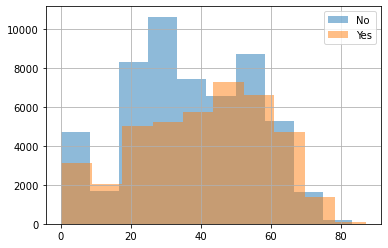

In [17]:

pass_data.groupby('Survived').Age.hist(legend=True, alpha=0.5)

# Summary

In [ ]:
# Отчет